imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

constants

In [2]:
pro_filename = r'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/professional_promatch_data.csv'
premier_filename = r'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/premier_promatch_data.csv'
intl_filename = r'https://dota-match-ids.s3.amazonaws.com/promatch_csvs/international_promatch_data.csv'

read the csv files

In [3]:
df_pro = pd.read_csv(pro_filename)
df_premier = pd.read_csv(premier_filename)
df_intl = pd.read_csv(intl_filename)

display the data

In [4]:
df_pro.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,5108885702,2665,1573480047,7314697.0,FIVE BROTHERS,7359442.0,Team Aspirations,11382,Asian DOTA2 Gold Occupation Competition,385455.0,1.0,57,38,True
1,1,5108800438,2855,1573476138,7408440.0,Look For Smile,7467648.0,Punch gaming,11382,Asian DOTA2 Gold Occupation Competition,385449.0,1.0,41,61,False
2,2,5108735167,2326,1573473148,7467648.0,Punch gaming,7408440.0,Look For Smile,11382,Asian DOTA2 Gold Occupation Competition,385443.0,1.0,42,31,True
3,3,5108711156,2619,1573471726,7253435.0,Team Galaxy,6634461.0,Team Sincere,11263,Masters Tournament,385430.0,1.0,39,44,False
4,4,5108703089,1431,1573471276,7443956.0,Black Knight,7451388.0,LieYing Team,11407,Elite Cup Season 2,385436.0,1.0,16,41,False


In [5]:
df_premier.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


In [6]:
df_intl.head()

,Unnamed: 0,match_id,duration,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_id,series_type,radiant_score,dire_score,radiant_win
0,0,4986461644,1474,1566733817,2586976.0,OG,2163.0,Team Liquid,10749,The International 2019,360940.0,2.0,20,11,True
1,1,4986362254,1403,1566730459,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,36,False
2,2,4986260666,1945,1566726706,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,11,40,False
3,3,4986133311,2914,1566721992,2163.0,Team Liquid,2586976.0,OG,10749,The International 2019,360940.0,2.0,33,24,True
4,4,4985891168,2194,1566713543,15.0,PSG.LGD,2163.0,Team Liquid,10749,The International 2019,360881.0,1.0,8,30,False


Drop columns that aren't relevant to Dire or Radiant team classification 

In [7]:
df_pro = df_pro.drop(columns=['Unnamed: 0', 'duration', 'start_time', 'leagueid', 'league_name', 'series_id','series_type'], axis=1)
df_premier = df_premier.drop(columns=['Unnamed: 0', 'duration', 'start_time', 'leagueid', 'league_name', 'series_id','series_type'], axis=1)
df_intl = df_intl.drop(columns=['Unnamed: 0', 'duration', 'start_time', 'leagueid', 'league_name', 'series_id','series_type'], axis=1)

Drop rows with missing values

In [8]:
df_pro = df_pro.dropna(axis=0)
df_premier = df_premier.dropna(axis=0)
df_intl = df_intl.dropna(axis=0)

Display the cleaned data sets

In [9]:
df_pro.head()

,match_id,radiant_team_id,radiant_name,dire_team_id,dire_name,radiant_score,dire_score,radiant_win
0,5108885702,7314697.0,FIVE BROTHERS,7359442.0,Team Aspirations,57,38,True
1,5108800438,7408440.0,Look For Smile,7467648.0,Punch gaming,41,61,False
2,5108735167,7467648.0,Punch gaming,7408440.0,Look For Smile,42,31,True
3,5108711156,7253435.0,Team Galaxy,6634461.0,Team Sincere,39,44,False
4,5108703089,7443956.0,Black Knight,7451388.0,LieYing Team,16,41,False


In [10]:
df_premier.head()

,match_id,radiant_team_id,radiant_name,dire_team_id,dire_name,radiant_score,dire_score,radiant_win
0,4986461644,2586976.0,OG,2163.0,Team Liquid,20,11,True
1,4986362254,2163.0,Team Liquid,2586976.0,OG,11,36,False
2,4986260666,2163.0,Team Liquid,2586976.0,OG,11,40,False
3,4986133311,2163.0,Team Liquid,2586976.0,OG,33,24,True
4,4985891168,15.0,PSG.LGD,2163.0,Team Liquid,8,30,False


In [11]:
df_intl.head()

,match_id,radiant_team_id,radiant_name,dire_team_id,dire_name,radiant_score,dire_score,radiant_win
0,4986461644,2586976.0,OG,2163.0,Team Liquid,20,11,True
1,4986362254,2163.0,Team Liquid,2586976.0,OG,11,36,False
2,4986260666,2163.0,Team Liquid,2586976.0,OG,11,40,False
3,4986133311,2163.0,Team Liquid,2586976.0,OG,33,24,True
4,4985891168,15.0,PSG.LGD,2163.0,Team Liquid,8,30,False


First we'll just examine the raw win percentages

Count the number of radiant wins and dire wins per league

In [12]:
pro_radiant_wins = df_pro[df_pro.radiant_win == True].shape[0]
pro_dire_wins = df_pro[df_pro.radiant_win == False].shape[0]

premier_radiant_wins = df_premier[df_premier.radiant_win == True].shape[0]
premier_dire_wins = df_premier[df_premier.radiant_win == False].shape[0]

intl_radiant_wins = df_intl[df_intl.radiant_win == True].shape[0]
intl_dire_wins = df_intl[df_intl.radiant_win == False].shape[0]

Plot the number of wins per team per league

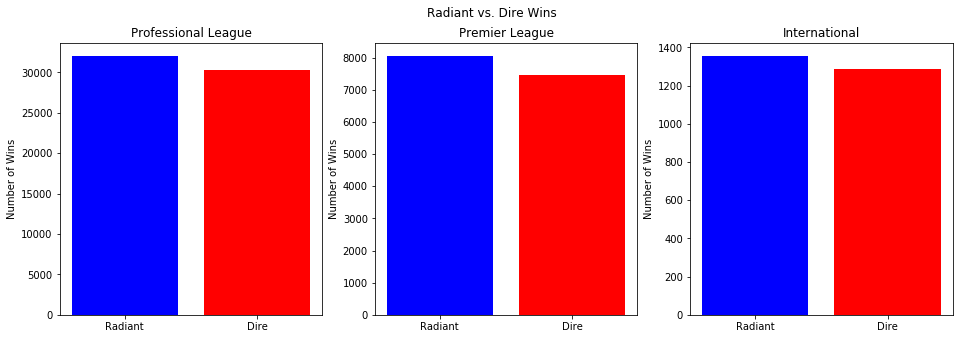

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
teams = ['Radiant', 'Dire']
wins = [pro_radiant_wins, pro_dire_wins, premier_radiant_wins, premier_dire_wins, intl_radiant_wins, intl_dire_wins]
ax1.bar(teams[0], wins[0], color='b')
ax1.bar(teams[1], wins[1], color='r')
ax2.bar(teams[0], wins[2], color='b')
ax2.bar(teams[1], wins[3], color='r')
ax3.bar(teams[0], wins[4], color='b')
ax3.bar(teams[1], wins[5], color='r')
ax1.set_title("Professional League")
ax2.set_title("Premier League")
ax3.set_title("International")
ax1.set_ylabel("Number of Wins")
ax2.set_ylabel("Number of Wins")
ax3.set_ylabel("Number of Wins")
fig.suptitle("Radiant vs. Dire Wins")
plt.show()

Calculate the numerical difference between the number of wins for each league

In [14]:
pro_diff = pro_radiant_wins - pro_dire_wins
premier_diff = premier_radiant_wins - premier_dire_wins
intl_diff = intl_radiant_wins - intl_dire_wins

Calculate the ratio of radiant wins to dire winsfor each league

In [15]:
pro_ratio = np.round(pro_radiant_wins / pro_dire_wins, decimals=3)
premier_ratio = np.round(premier_radiant_wins / premier_dire_wins, decimals=3)
intl_ratio = np.round(intl_radiant_wins / intl_dire_wins, decimals=3)

Display the difference

In [16]:
print('Difference Between Radiant vs. Dire Wins')
print('\tProfessional League')
print('\t\tRadiant +{} wins over Dire'.format(pro_diff))
print('\t\tRatio: {}'.format(pro_ratio))
print('\tPremier League')
print('\t\tRadiant +{} wins over Dire'.format(premier_diff))
print('\t\tRatio: {}'.format(premier_ratio))
print('\tInternational')
print('\t\tRadiant +{} wins over Dire'.format(intl_diff))
print('\t\tRatio: {}'.format(intl_ratio))

Difference Between Radiant vs. Dire Wins
	Professional League
		Radiant +1738 wins over Dire
		Ratio: 1.057
	Premier League
		Radiant +597 wins over Dire
		Ratio: 1.08
	International
		Radiant +67 wins over Dire
		Ratio: 1.052


This is pretty interesting. While small, both the bar plots and the ratios of Radiant wins to Dire wins show that teams under the Radiant name win slightly more games than Dire teams. And the ratio of Radiant wins to Dire wins for each of the three levels of play are also similar. This may indicate that the hero-picking strategy may not be completely fair or there is another in-game factor leading to a small, but fairly consistent difference in the number of Radiant wins vs. Dire wins.

Now let's look at points scored per team per league

Calculate the mean score for each team for each league

In [17]:
pro_radiant_mean = df_pro['radiant_score'].mean()
pro_dire_mean = df_pro['dire_score'].mean()

premier_radiant_mean = df_premier['radiant_score'].mean()
premier_dire_mean = df_premier['dire_score'].mean()

intl_radiant_mean = df_intl['radiant_score'].mean()
intl_dire_mean = df_intl['dire_score'].mean()

Calculate the median of scores for each team for each league

In [18]:
pro_radiant_median = df_pro['radiant_score'].median()
pro_dire_median = df_pro['dire_score'].median()

premier_radiant_median = df_premier['radiant_score'].median()
premier_dire_median = df_premier['dire_score'].median()

intl_radiant_median = df_intl['radiant_score'].median()
intl_dire_median = df_intl['dire_score'].median()

Calculate the standard deviation of scores for each team for each league

In [19]:
pro_radiant_std = df_pro['radiant_score'].std()
pro_dire_std = df_pro['dire_score'].std()

premier_radiant_std = df_premier['radiant_score'].std()
premier_dire_std = df_premier['dire_score'].std()

intl_radiant_std = df_intl['radiant_score'].std()
intl_dire_std = df_intl['dire_score'].std()

Calculate the variance of scores for each team for each league

In [20]:
pro_radiant_var = np.round(df_pro['radiant_score'].var(), decimals=3)
pro_dire_var = np.round(df_pro['dire_score'].var(), decimals=3)

premier_radiant_var = np.round(df_premier['radiant_score'].var(), decimals=3)
premier_dire_var = np.round(df_premier['dire_score'].var(), decimals=3)

intl_radiant_var = np.round(df_intl['radiant_score'].var(), decimals=3)
intl_dire_var = np.round(df_intl['dire_score'].var(), decimals=3)

Calculate the max scores for each team for each league

In [21]:
pro_radiant_max = df_pro['radiant_score'].max()
pro_dire_max = df_pro['dire_score'].max()

premier_radiant_max = df_premier['radiant_score'].max()
premier_dire_max = df_premier['dire_score'].max()

intl_radiant_max = df_intl['radiant_score'].max()
intl_dire_max = df_intl['dire_score'].max()

Calculate the min scores for each team for each league

Plot the statistics regarding the scores

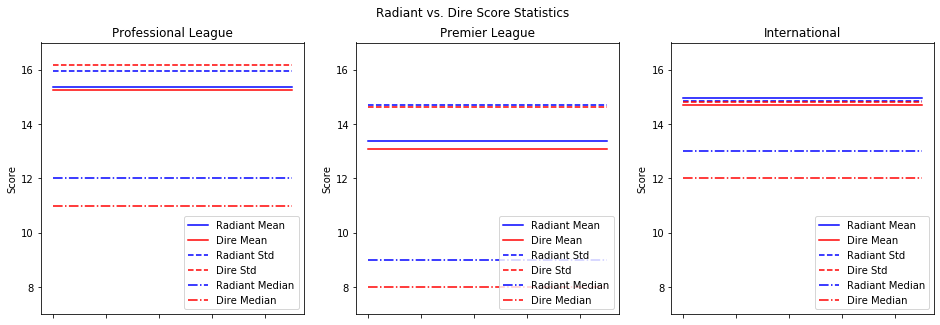

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
x = range(10)
ax1.plot(x, [pro_radiant_mean for _ in range(10)], color='b', linestyle='-', label='Radiant Mean')
ax1.plot(x, [pro_dire_mean for _ in range(10)], color='r', linestyle='-', label='Dire Mean')
ax1.plot(x, [pro_radiant_std for _ in range(10)], color='b', linestyle='--', label='Radiant Std')
ax1.plot(x, [pro_dire_std for _ in range(10)], color='r', linestyle='--', label='Dire Std')
ax1.plot(x, [pro_radiant_median for _ in range(10)], color='b', linestyle='-.', label='Radiant Median')
ax1.plot(x, [pro_dire_median for _ in range(10)], color='r', linestyle='-.', label='Dire Median')

ax2.plot(x, [premier_radiant_mean for _ in range(10)], color='b', linestyle='-', label='Radiant Mean')
ax2.plot(x, [premier_dire_mean for _ in range(10)], color='r', linestyle='-', label='Dire Mean')
ax2.plot(x, [premier_radiant_std for _ in range(10)], color='b', linestyle='--', label='Radiant Std')
ax2.plot(x, [premier_dire_std for _ in range(10)], color='r', linestyle='--', label='Dire Std')
ax2.plot(x, [premier_radiant_median for _ in range(10)], color='b', linestyle='-.', label='Radiant Median')
ax2.plot(x, [premier_dire_median for _ in range(10)], color='r', linestyle='-.', label='Dire Median')

ax3.plot(x, [intl_radiant_mean for _ in range(10)], color='b', linestyle='-', label='Radiant Mean')
ax3.plot(x, [intl_dire_mean for _ in range(10)], color='r', linestyle='-', label='Dire Mean')
ax3.plot(x, [intl_radiant_std for _ in range(10)], color='b', linestyle='--', label='Radiant Std')
ax3.plot(x, [intl_dire_std for _ in range(10)], color='r', linestyle='--', label='Dire Std')
ax3.plot(x, [intl_radiant_median for _ in range(10)], color='b', linestyle='-.', label='Radiant Median')
ax3.plot(x, [intl_dire_median for _ in range(10)], color='r', linestyle='-.', label='Dire Median')

ax1.set_title("Professional League")
ax2.set_title("Premier League")
ax3.set_title("International")
ax1.set_ylabel("Score")
ax2.set_ylabel("Score")
ax3.set_ylabel("Score")
ax1.set_ylim([7,17])
ax2.set_ylim([7,17])
ax3.set_ylim([7,17])
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax3.legend(loc="lower right")
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
fig.suptitle("Radiant vs. Dire Score Statistics")
plt.show()

Things to note from these plots:
 - The average and median of Radiant teams in all 3 levels of play are higher than those of Dire teams
 - The standard deviations of both teams are similar to each other in all three leagues
 - In all three leagues, the median scores are lower than the mean scores

Print out the variance of the scores for each team for each league

In [23]:
print('Variance of Radiant Scores and Dire Scores')
print('\tProfessional League')
print('\t\tRadiant Variance: {}'.format(pro_radiant_var))
print('\t\tDire Variance: {}'.format(pro_dire_var))
print('\tPremier League')
print('\t\tRadiant Variance: {}'.format(premier_radiant_var))
print('\t\tDire Variance: {}'.format(premier_dire_var))
print('\tInternational')
print('\t\tRadiant Variance: {}'.format(intl_radiant_var))
print('\t\tDire Variance: {}'.format(intl_dire_var))

Variance of Radiant Scores and Dire Scores
	Professional League
		Radiant Variance: 254.914
		Dire Variance: 261.277
	Premier League
		Radiant Variance: 215.68
		Dire Variance: 214.278
	International
		Radiant Variance: 220.299
		Dire Variance: 219.649


The variances of each of the teams in the three levels of play are all fairly high and are all of the same magnitude. The variance doesn't seem to tell us much about the scores.

Print out the max scores for each team for each league

In [24]:
print('Maximum Score of Radiant and Dire Teams')
print('\tProfessional League')
print('\t\tRadiant Maximum Score: {}'.format(pro_radiant_max))
print('\t\tDire Maximum Score: {}'.format(pro_dire_max))
print('\tPremier League')
print('\t\tRadiant Maximum Score: {}'.format(premier_radiant_max))
print('\t\tDire Maximum Score: {}'.format(premier_dire_max))
print('\tInternational')
print('\t\tRadiant Maximum Score: {}'.format(intl_radiant_max))
print('\t\tDire Maximum Score: {}'.format(intl_dire_max))

Maximum Score of Radiant and Dire Teams
	Professional League
		Radiant Maximum Score: 89
		Dire Maximum Score: 97
	Premier League
		Radiant Maximum Score: 82
		Dire Maximum Score: 83
	International
		Radiant Maximum Score: 63
		Dire Maximum Score: 64


This is interesting as well. Radiant teams in all three leagues of play actually had a lower maximum score than Dire teams, even though it appears that Radiant teams win more games than Dire teams do from my previous analysis. Also of note is that the maximum score of both Radiant and Dire teams falls as the level of play increases; this is presumably because teams get better at playing defense as they get better and increase their level of play.

Conclusions

From my analysis, it does appear that Radiant teams do have a slight advantage over Dire teams as the data showed that Radiant teams win more games than Dire teams do at all 3 higher levels of play. This is also supported by the fact that the mean and median scores of Radiant teams are higher than those of Dire teams. Of interesting note, however; the maximum scores of Dire teams in all three levels of play were higher than the maximum scores of Radiant teams.

So Radiant teams may have an advantage, but where is it coming from? My first idea is that the picking strategy to set up the gameplay is slightly unfair. My second idea is that there is some other internal gameplay feature that makes it unfair. So I did some research on the internet.

The internet confirmed that there is, in fact, a win advantage for Radiant teams over Dire teams. One figure even said there was as high as a 9.6% advantage for Radiant teams over Dire teams. It also appears that there is a consensus on the cause of the advantage, and apparently it is perceived to be the way the game map is set up.